In [27]:
import sys
# append the path of the parent directory
sys.path.append("..")

import os
import numpy as np

from LandSlideDyna.viz import ArrayVisualizer

In [28]:
def check_npy_matrices(root_data_dir):
    """
    Check that all .npy files within the '04_FinalProcessedData' subfolders
    are 512x512 matrices and print the actual shape of the incorrect ones.

    Args:
        root_data_dir (str): The root directory containing model directories.

    Returns:
        list: A list of tuples with the file path, a boolean indicating
              whether the matrix is 512x512, and the actual shape if not.
    """
    final_processed_data_folder = '04_FinalProcessedData'
    checked_files = []

    # Iterate over each model directory in the root_data_dir
    for model_dir in next(os.walk(root_data_dir))[1]:
        final_data_dir = os.path.join(root_data_dir, model_dir, final_processed_data_folder)

        # Check if the '04_FinalProcessedData' directory exists
        if os.path.exists(final_data_dir):
            # Walk through the directory tree starting at final_data_dir
            for root, dirs, files in os.walk(final_data_dir):
                for file in files:
                    if file.endswith('.npy'):
                        file_path = os.path.join(root, file)
                        matrix = np.load(file_path)
                        matrix_shape = matrix.shape

                        # Check if the matrix is 512x512
                        is_correct_shape = matrix_shape == (256, 256)
                        checked_files.append((file_path, is_correct_shape, matrix_shape if not is_correct_shape else None))

                        # Print the actual shape if it is not 512x512
                        if not is_correct_shape:
                            print(f"Incorrect matrix size in file: {file_path}, Actual shape: {matrix_shape}")

    return checked_files

In [29]:
root_data_dir = r"C:\Users\thomas.bush\repos\dyna-landslide-surrogate\data_small"


In [30]:

results = check_npy_matrices(root_data_dir)

00002
(256, 256)


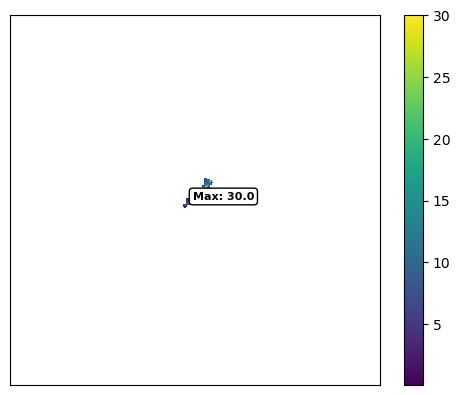

Maximum value in the array: 30.0
00003
(256, 256)


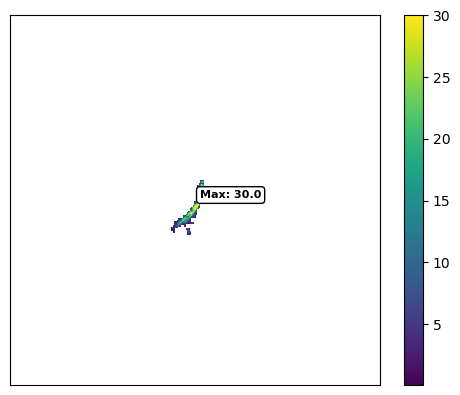

Maximum value in the array: 30.0
00004
(256, 256)


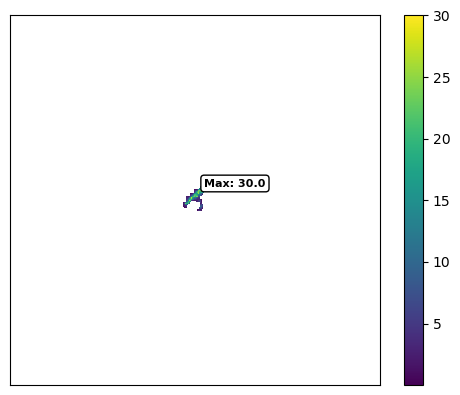

Maximum value in the array: 30.0
00005
(256, 256)


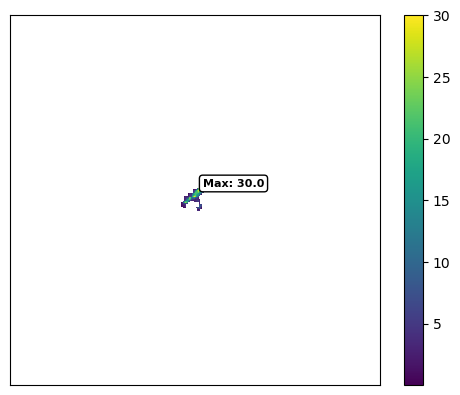

Maximum value in the array: 30.0
00006
(256, 256)


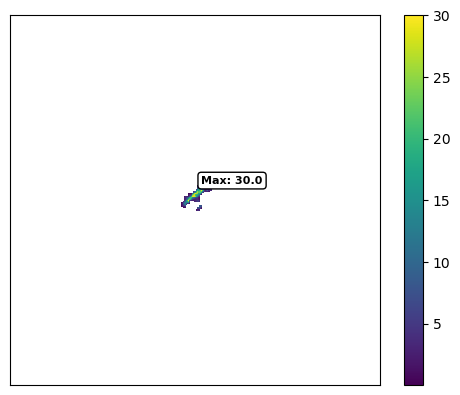

Maximum value in the array: 30.0
00007
(256, 256)


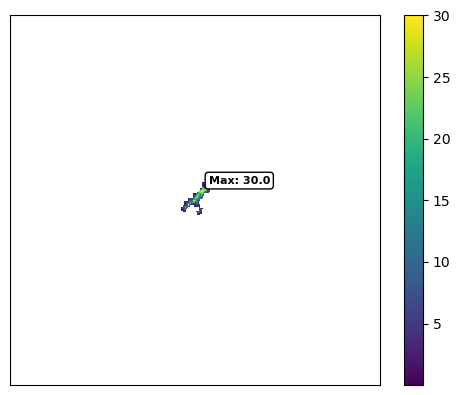

Maximum value in the array: 30.0
00008
(256, 256)


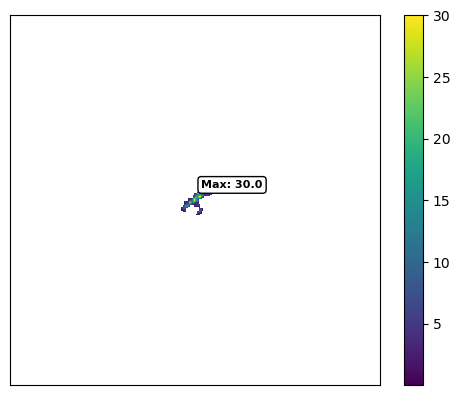

Maximum value in the array: 30.0
00009
(256, 256)


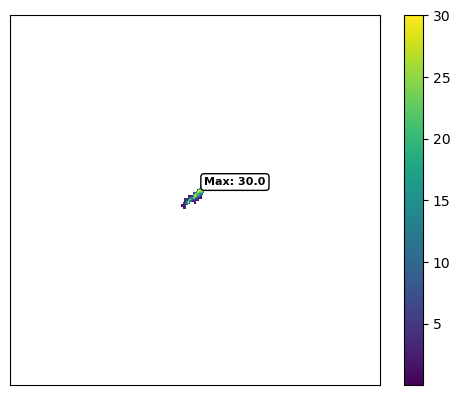

Maximum value in the array: 30.0
00010
(256, 256)


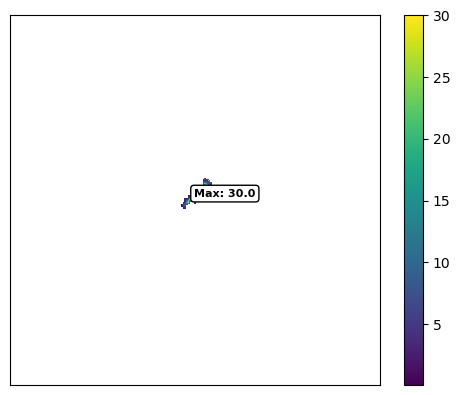

Maximum value in the array: 30.0
00072
(256, 256)


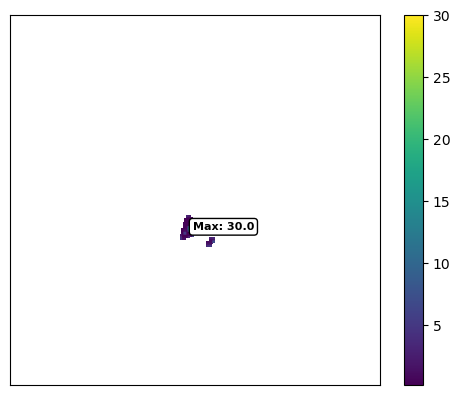

Maximum value in the array: 30.0
00184
(256, 256)


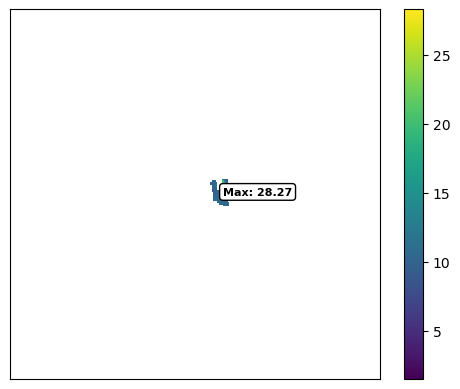

Maximum value in the array: 28.27
00295
(256, 256)


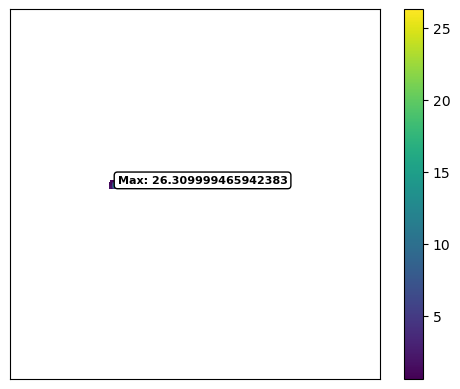

Maximum value in the array: 26.309999465942383
00400
(256, 256)


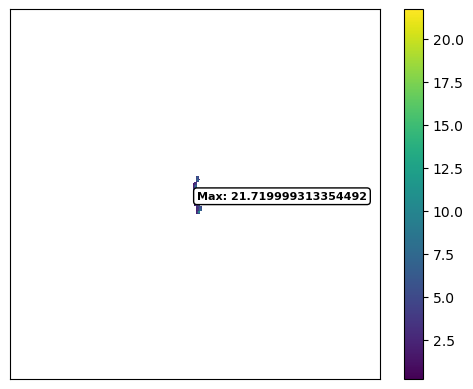

Maximum value in the array: 21.719999313354492


In [32]:
model_id = ['00002', '00003', '00004', '00005', '00006', '00007', '00008', '00009', '00010', '00072', '00184', '00295', '00400']

for model in model_id:
    # array_path = fr"C:\Users\thomas.bush\repos\dyna-landslide-surrogate\data_small\{model}\04_FinalProcessedData\elevation\{model}_elevation.npy"
    array_path = fr"C:\Users\thomas.bush\repos\dyna-landslide-surrogate\data_small\{model}\04_FinalProcessedData\velocity\{model}_velocity_33.npy"

    array = np.load(array_path)
    print(model)
    print(array.shape)

    viz = ArrayVisualizer()

    viz.plot_array(array)